## 1 - Imports and methods

In [1]:
# import required packages

import pandas as pd
import numpy as np
import re
import global_options
from pathlib import Path
from cleantext import clean # install via: pip install clean-text

#import the word-lists
expanded_dict = pd.read_csv(Path(global_options.OUTPUT_FOLDER, "dict", "expanded_dict.csv"))
wordlist = [x.replace('_',' ') for x in list(expanded_dict['biodiversity'].dropna())]

In [2]:
# required methods

def get_ngrams(s, n):
    '''
    tokenize an input text 
    source: https://albertauyeung.github.io/2018/06/03/generating-ngrams.html
    '''
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

def cleaner(txt):    
    '''
    Clean the input text
    '''
    return clean(
        txt,
        fix_unicode=True,               # fix various unicode errors
        to_ascii=True,                  # transliterate to closest ASCII representation
        lower=True,                     # lowercase text
        no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
        no_urls=True,                  # replace all URLs with a special token
        no_emails=True,                # replace all email addresses with a special token
        no_phone_numbers=True,         # replace all phone numbers with a special token
        no_numbers=True,                # replace all numbers with a special token
        no_digits=True,                 # replace all digits with a special token
        no_currency_symbols=True,      # replace all currency symbols with a special token
        no_punct=True,                 # remove punctuations
        replace_with_punct="",          # instead of removing punctuations you may replace them
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="",
        replace_with_currency_symbol="",
        lang="en"                       # set to 'de' for German special handling
        )

def score_calculator(text):
    '''
    return the biodiversity scores for an input text
    '''
    try:      
        text=re.sub('[\\n]','',text)
        text=get_ngrams(text,1)+get_ngrams(text,2)+get_ngrams(text,3)+get_ngrams(text,4)
        counts=[]
        counts= [text.count(x) for x in wordlist]
        freq=sum(counts) 
        diversity = len([x for x in counts if x!=0])    
        return diversity/len(wordlist)
    except Exception as ex:
        print(ex)
        return 0


## 2 - Score calculation

In [3]:
# An example
# text from copy paste of the https://www.ft.com/content/c642343b-589e-4347-9a7f-ff04b83728ff

text='''The power of Europe’s rebellious farmers Alice Hancock and Andy Bounds in Brussels The highway from the Belgian city of Namur to Brussels suffered a traffic jam like none other last week. Around 700 tractors and 1,500 farmers blocked the road, many staying for 36 hours. It was not an isolated event. Farmers who have been protesting across the EU for several months have dramatically escalated their actions over the past few weeks, obstructing major arteries and city streets in France, Romania, Germany, Spain, Poland, the Netherlands and Latvia among other EU states. They have barricaded supermarkets, dumped manure, set hay bales alight, ransacked food distribution lorries and pelted police with eggs. In France, farmers threatened to “lay siege” to Paris, while in Belgium they blocked the port of Zeebrugge. In Italy, as some farmers drove their tractors to Rome, others paraded a cow through Milan’s streets. “We don’t have any other possibilities but to protest,” says Sebastien Geens, one of the 1,500 farmers on the road from Namur. “Our only power is to get out our tractors and block.” Farmers from Macedonia drove to Thessaloniki in Greece to demand greater support of the farming sector at the 30th Agrotica exhibition, an agricultural trade fair, this month © Achilleas Chiras/EPA-EFE They are consumed by what Belgian prime minister Alexander De Croo described this month as a multi-layered “lasagne” of problems: volatile prices, high costs, cumbersome legislation and unfair competition. A reform of the bloc’s near €60bn-a-year Common Agricultural Policy (CAP), which sets subsidies and environmental conditions for the sector and accounts for around two-fifths of the EU’s total budget, has added to the burden. Though agricultural workers only constitute around 4 per cent of the EU’s working population, their protests have received a rapid — and, critics say, knee-jerk — reaction from politicians in Brussels and beyond. €13bn Agricultural imports from Ukraine to the EU in 2022, up from €7bn the year prior As the demonstrations escalated, the European Commission gave farmers a temporary exemption from rules to set aside land for nature conservation. They also partly reversed a 2021 decision to allow free access for agricultural imports from Ukraine, which jumped from €7bn to €13bn in 2022, causing gluts and undercutting prices in eastern European countries. This week, the farmers won their biggest concession yet. Under pressure from EU leaders and her own conservative political group, European Commission President Ursula von der Leyen dumped parts of her cherished Green Deal climate law. She announced on Tuesday that a proposal to halve pesticide use, seen as crucial to the bloc’s biodiversity goals, would be scrapped and rewritten, to applause from the European parliament. The same day, the commission also cut a notional target for reducing agricultural emissions from its landmark 2040 climate plan. “Our farmers deserve to be listened to,” Von der Leyen said. “I know that they are worried about the future of agriculture and about their future as farmers.” The threat to Brussels from farmers in revolt goes beyond voters irritated that their major cities are clogged with tractors. The protesters have tapped into a rising sense of frustration — especially among conservatives and supporters of the far-right — that European policymakers are imposing too many restrictions on working people in the name of environmental progress. Mainstream lawmakers have opted to chase more numerous urban voters with “an extreme environmentalist agenda,” says John O’Brien, a spokesperson for MCC Brussels, a think-tank funded by Hungary’s rightwing government of Viktor Orbán, leaving “a disconnect between the elite politicians and the concerns of ordinary people”. Policymakers fear that sustained or more dramatic action from farmers could play into the hands of the extreme right-wing, who are already expected to make significant gains in EU parliamentary elections taking place in June. But environmental groups say conceding to their demands so rapidly sets a damaging precedent as the EU attempts to bring in industrial reforms to reduce greenhouse gas emissions. “It sends a very clear message to any lobby that doesn’t like the changes that are needed, that if the political system is going in a direction that you don’t like, you should just throw the toys out of the pram and they will give you a free pass,” says Ariel Brunner, director of the environmental NGO BirdLife Europe. “Today it is the intensive farm lobby and tomorrow it is anyone else”. Farmers in Europe have long felt like they are getting a raw deal from Brussels. In 2012, for example, farmers sprayed milk at the European parliament to protest cuts to EU milk quotas. Dutch farmers brought parts of the country to a standstill in months of protests in 2022 over government plans to implement EU rules to cut nitrogen emissions that would have resulted in farms shutting down. But the demonstrations in recent weeks are unprecedented in how far they have spread, and the range of issues at play. Those who have taken to the streets say that the impacts of the Covid pandemic and the war in Ukraine pushed up energy costs, and cheap imports, both from Ukraine and from countries with lower environmental standards, have flattened prices. Now the EU’s ambitious climate targets threaten to pile more levies and onerous regulation on them. “It is getting more and more strict and more and more difficult to be a farmer,” says Robins Lellis, who drove his tractor to protest in Valmiera in Latvia this week. Patrick Pagani, deputy secretary general of Copa-Cogeca, the pan-European farmers’ lobby group, says the commission under Von der Leyen had adopted a “top down” and “very punitive” approach to agriculture in its landmark Green Deal, first announced in 2019. “In recent years, there have been so many proposals that are very polarising, targeting the farming sector. There are targets but not the means to hit them.” One Belgian protesting in Brussels tells the FT that the bank was likely to reclaim his farm next year if he did not meet a loan repayment that he was unlikely to afford because recent nitrogen emissions rules would reduce how much land he could use. “When they kill me, I’ll kill a politician,” he says. In Italy, as some farmers drove their tractors to Rome, others paraded a cow through Milan’s streets © Andrea Fasani/EPA-EFE Lawmakers worry this kind of radicalisation will be meat and potatoes for the far right, who are already making gains across the bloc on the back of rising immigration and falling living standards. The latest polls predict that the European parliament’s two rightwing groups could gain around 40 seats in the June election, giving them 175 in the enlarged 720-strong chamber, with the Greens losing 23. Rural voters disproportionately vote for Eurosceptic parties of both left and right, a report for the Committee of the Regions, an EU institution, noted this month. “Eurosceptic voting can start in particular areas — and these areas are often rural areas — and then gain wider national attention and support,” says Jennifer McGuinn, director of Milieu Consulting and report co-author. Often a local election can trigger wider policy change and “act as a catalyst for party consolidation and for parties’ political shifts,” she adds. The reality is that all politicians are going to be in competition now to get the ear of the farmers, because the farmers have the attention of Europe In the Netherlands, for example, the upstart Farmer-Citizen movement triumphed in provincial elections last March. By November, disillusionment with the country’s centre-right coalition propelled right-wing firebrand Geert Wilders into first place. Liberal and Green politicians, particularly in Germany where Green economy minister Robert Habeck was trapped on a ferry in January by angry farmers, blame the far-right for inflaming an already febrile situation and urging protests. But farmers say they just want to be heard. They have not felt represented “for years”, says Helen O’Sullivan, an Irish farmer who plans to run as an independent candidate in West Cork. The demonstrations may have changed that, says O’Brien of the MCC think-tank, which helped organise a protest in Brussels last month. “The reality is that all politicians are going to be in competition now to get the ear of the farmers, because the farmers have the attention of Europe.” The concessions won by the farmers may only bring gains in the short term, however. Farming is among the sectors set to be most affected by the extreme weather events resulting from global warming. Of the four key risks to Europe from temperature increases, highlighted by the Intergovernmental Panel on Climate Change, “substantive agricultural production losses” is one. Others include water scarcity and flooding — both of which are already starting to hit farmers hard. At the same time the agriculture sector is responsible for more than 10 per cent of the EU’s greenhouse gas emissions. Meeting EU climate goals, including an overarching aim of net zero emissions by 2050, will require “the biggest overhaul of farming since world war two,” says Laurence Tubiana, chief executive of the European Climate Foundation and an architect of the 2015 Paris climate accord. This is an exceptional situation and we have to look for exceptional solutions The CAP, which aims to maximise productivity and benefits those with the most land, is too unequal, she says. “It maintains some farmers just at survival limit while others are gifted with many more resources.” Some 80 per cent of the scheme’s money goes to just 20 per cent of farmers. It should be rethought to help farmers with high levels of indebtedness and to distribute costs more evenly across the supply chain so that farmers are not left in hock to prices dictated by large agri-food businesses and supermarkets, she says. EU officials are already brainstorming ideas for a revision of the CAP but that will not come into force until 2027, leaving policymakers trying to find more immediate ways to respond to farmers’ concerns. Janusz Wojciechowski, the bloc’s agricultural commissioner, tells the FT that he wants EU countries be allowed to use state aid to supplement CAP payments and suspend penalties for farmers who fail to meet environmental requirements. “This is an exceptional situation and we have to look for exceptional solutions,” he says. Farmers in Spain join the demonstrations against European agricultural policies this week. The protests obstructed major arteries and city streets in several EU states © David Borrat/EPA-EFE But other EU officials are sceptical about the ideas, noting that EU state aid is already at record levels. Ahead of a meeting of the bloc’s agriculture ministers on February 26, officials are focusing instead on ways to cut red tape. Policymakers must not get sucked into seeing the farming sector as “one monolithic group”, says one official, that stages protests under simplified slogans such as “no farmers, no food”. Many farmers, particularly young ones, who feared losing crop yields to fires, droughts and floods were already making a transition to more sustainable practices and should be better incentivised for their efforts, they add. “We are the first people in the chain that feel the effects of climate change,” says Michiel Sys, a 26-year-old Flemish farmer protesting near the Belgian coast. What is clear is that despite their victory this week, many farmers who have taken to the street are in no mood to back down. Political leaders have until next week to “come up with solutions” otherwise there would be more protests, says Sys. “We are very desperate.” Climate Capital Where climate change meets business, markets and politics. Explore the FT’s coverage here. Are you curious about the FT’s environmental sustainability commitments? Find out more about our science-based targets here'''


In [4]:
score = score_calculator(text)
print('''Biodiversity Score: {0} '''.format(np.round(score, 3)))

Biodiversity Score: 0.026 


## 3 - Wordcloud

In [5]:
# imports
import matplotlib.pyplot as plt
from wordcloud import WordCloud # install via: pip install wordcloud
from IPython.display import Image


expanded_dict = pd.read_csv(Path(global_options.OUTPUT_FOLDER, "dict", "expanded_dict.csv"))
wordlist = [x.replace('_',' ') for x in list(expanded_dict['biodiversity'].dropna())]

# definitaions
def word_cloud(text):
    try:      
        text=re.sub('[\\n]','',text)
        text=get_ngrams(text,1)+get_ngrams(text,2)+get_ngrams(text,3)+get_ngrams(text,4)
        counts=[]
        counts= [text.count(x) for x in wordlist]
        dic=dict(zip(wordlist, counts))
       
    except Exception as ex:
        print(ex)
        dic={' ':1}

    mydictionary = {}
    mydictionary.update(dic)
    
    wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate_from_frequencies(mydictionary)
    plt.figure(figsize=(15,8))
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

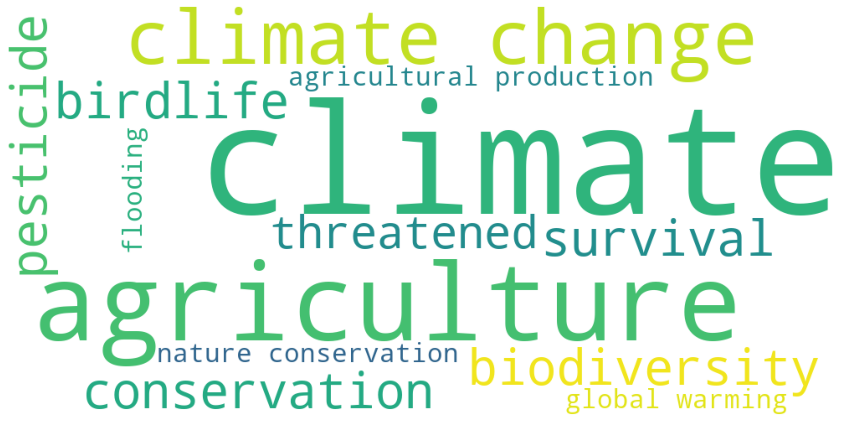

In [6]:
word_cloud(text)